In [57]:
# Импорт необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Загрузка данных из файла
data = pd.read_csv('measurements.csv')

# Предварительный просмотр данных
print(data.head())

   startx  starty  endx  endy  distance  note
0     5.0    10.7   5.4  12.3      1.60   NaN
1    14.1    13.9  12.6  14.5      1.64  Test
2    10.5    12.7  11.8  13.6      1.65   NaN
3    10.5    12.7  11.8  13.6      1.65  Note
4    17.1    10.3  15.9  11.3      1.62   NaN


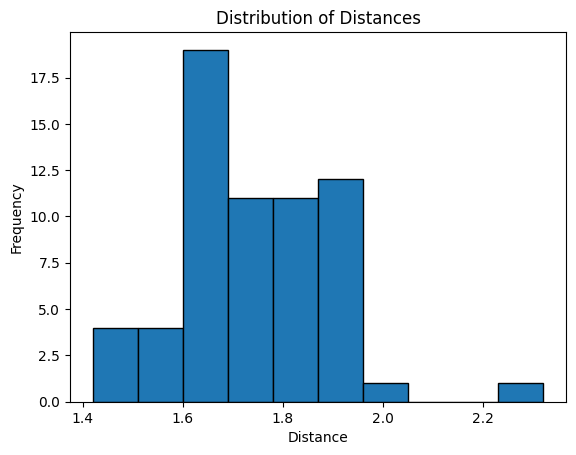

In [58]:
plt.hist(data['distance'], bins=10, edgecolor='black')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of Distances')
plt.show()

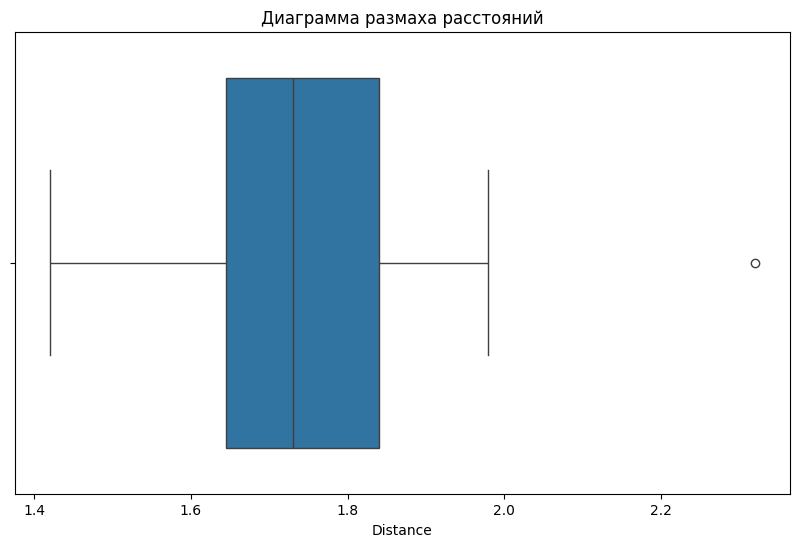

In [59]:
# Построим диаграмму размаха (boxplot) для расстояний
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['distance'])
plt.title('Диаграмма размаха расстояний')
plt.xlabel('Distance')
plt.show()

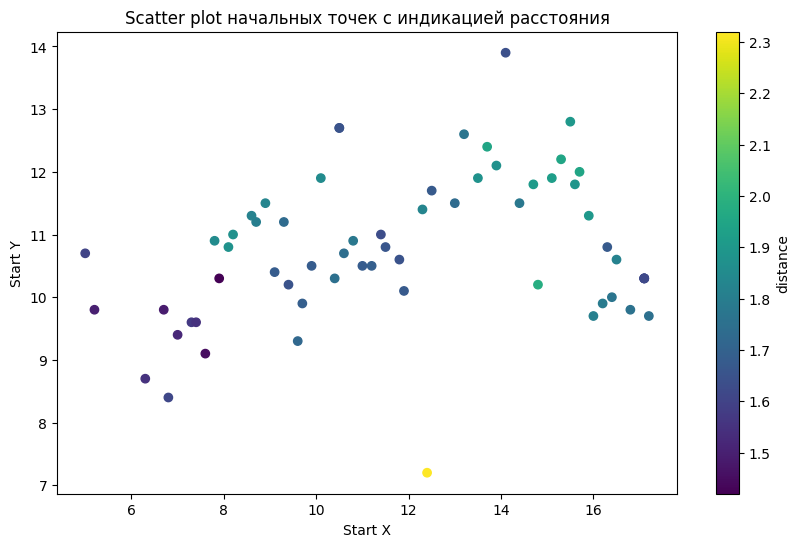

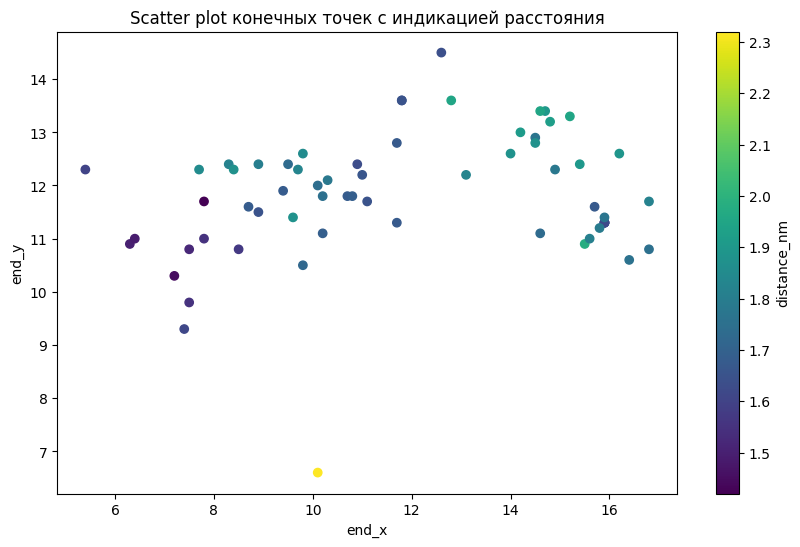

In [60]:
# Построим scatter plot для начальных и конечных точек с цветовой индикацией расстояния
plt.figure(figsize=(10, 6))
plt.scatter(data['startx'], data['starty'], c=data['distance'], cmap='viridis')
plt.colorbar(label='distance')
plt.title('Scatter plot начальных точек с индикацией расстояния')
plt.xlabel('Start X')
plt.ylabel('Start Y')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(data['endx'], data['endy'], c=data['distance'], cmap='viridis')
plt.colorbar(label='distance_nm')
plt.title('Scatter plot конечных точек с индикацией расстояния')
plt.xlabel('end_x')
plt.ylabel('end_y')
plt.show()

In [61]:
# Дополнительный анализ: статистические данные по расстояниям
mean_distance = data['distance'].mean()
median_distance = data['distance'].median()
std_distance = data['distance'].std()

print(f"Среднее расстояние: {mean_distance:.2f} нм")
print(f"Медианное расстояние: {median_distance:.2f} нм")
print(f"Стандартное отклонение расстояния: {std_distance:.2f} нм")

Среднее расстояние: 1.74 нм
Медианное расстояние: 1.73 нм
Стандартное отклонение расстояния: 0.15 нм


In [62]:
# Пример расчета расстояний из начальных и конечных координат
data['calculated_distance'] = np.sqrt((data['endx'] - data['startx'])**2 + 
                                      (data['endy'] - data['starty'])**2)
print(data.head())

   startx  starty  endx  endy  distance  note  calculated_distance
0     5.0    10.7   5.4  12.3      1.60   NaN             1.649242
1    14.1    13.9  12.6  14.5      1.64  Test             1.615549
2    10.5    12.7  11.8  13.6      1.65   NaN             1.581139
3    10.5    12.7  11.8  13.6      1.65  Note             1.581139
4    17.1    10.3  15.9  11.3      1.62   NaN             1.562050


In [63]:
# Проверим корреляцию между указанным и рассчитанным расстоянием
correlation = data['distance'].corr(data['calculated_distance'])
print(f"Корреляция между указанным и рассчитанным расстоянием: {correlation:.2f}")


Корреляция между указанным и рассчитанным расстоянием: -0.08


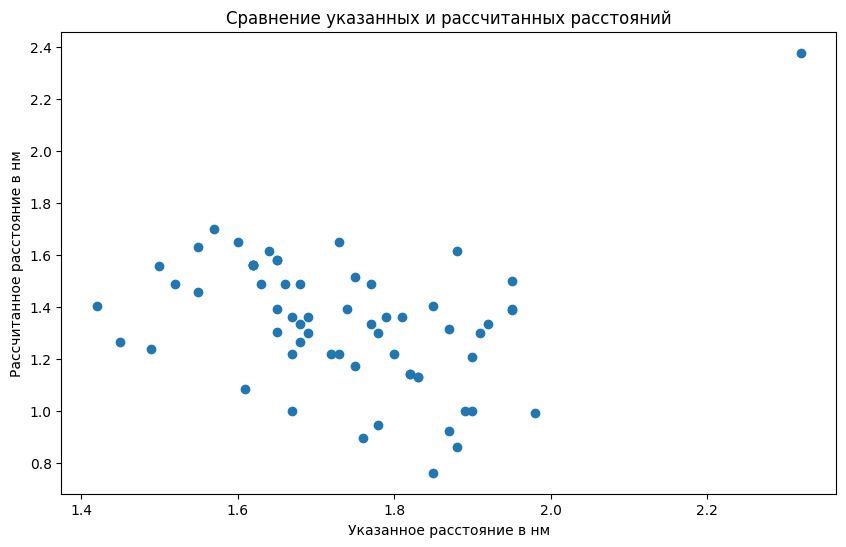

In [64]:
# Построим scatter plot для сравнения указанных и рассчитанных расстояний
plt.figure(figsize=(10, 6))
plt.scatter(data['distance'], data['calculated_distance'])
plt.xlabel('Указанное расстояние в нм')
plt.ylabel('Рассчитанное расстояние в нм')
plt.title('Сравнение указанных и рассчитанных расстояний')
plt.show()